# Problem formulation: 
>### * Differences between male and female in how they choose their mate
>### * Which variable has biggest impact on getting a date

# 1. Importing all the neccessary library


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [15]:
!PWD
pd.options.display.max_rows = 400

/Users/johntoro/Documents/Study Document/NTU/Sem 2 AN 2021-2022/SC1015/Project/SpeedDating-SC1015-project-/Developers/John


First we have to read the data using csv reading function


In [3]:
data = pd.read_csv("data/data.csv", encoding= 'ISO-8859-1')
data.head(10)
# data.shape

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print(data.shape)
data.dtypes

(8378, 195)


iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [5]:
def countFreq(arr, n):
    mp = dict()
    for i in range(n):
        if arr[i] in mp.keys():
            mp[arr[i]] += 1
        else:
            mp[arr[i]] = 1
    for x in mp:
        print(x, " ", mp[x])
def splitGender(df):
    mask_male = (df["gender"] == 1)
    mask_female = (df["gender"] == 0)
    return [df[mask_male].drop(["gender"], axis = 1), df[mask_female].drop(["gender"], axis = 1)]

In [6]:
print(data.isnull().sum())

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

# 2. Similarity variables
            - Does similarity of subject and partner decide anything
   

### Here i am looking for how important variables such as similarsites(Shared interest, race, same field, same region) are
> We already have the subject's hobby preference: 17 variables ranged: 1-10 scale on how subject interested in activities. Sports, tvsports, exercise,... So to see whether subject and partner like each other or not we create SharedInterest variable which is the correlation coefficient among 2 people interest. This variable range from 0->1


### Mapping partner position inside the similar dataset

In [7]:
interests = ["sports", "tvsports", "exercise", "dining", "museums", 
             "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", 
             "movies", "concerts", "music", "shopping", "yoga"]
data[interests].isnull().sum()
# print(data["match"].isnull().sum())

sports      79
tvsports    79
exercise    79
dining      79
museums     79
art         79
hiking      79
gaming      79
clubbing    79
reading     79
tv          79
theater     79
movies      79
concerts    79
music       79
shopping    79
yoga        79
dtype: int64

#### Here we can see a systematically missing 79 values in ```interests``` category,  (This is due to all of 79 missing values come from exactly 79 rows, 79 people did not fill this part of survey) we just remove these rows

In [8]:
data_sim = data.copy()
data_sim = data_sim[data_sim["sports"].notna()]
data_sim.shape

(8299, 195)

In [9]:
similar = pd.DataFrame(data_sim[["match", "gender"]])
similar

,match,gender
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0
...,...,...
8373,0,1
8374,0,1
8375,0,1
8376,0,1


In [10]:
id_table = {}
cnt_missing_partner = 0
for i in range(data_sim.shape[0]):
    id_table[(data_sim.iloc[i]["iid"], data_sim.iloc[i]["id"])] = i

partner = []
temp = pd.Series(np.array([0.0 for i in range(data_sim.shape[0])]), index = data_sim.index)

for i in range(data_sim.shape[0]):
    own_in = data_sim[interests].iloc[i]
    partner_in = []
    partner_iid = data_sim.iloc[i]["pid"]
    partner_id = data_sim.iloc[i]["partner"]
    partner_index = 0
    if(id_table.get((partner_iid, partner_id))):
        partner_index = id_table.get((partner_iid, partner_id))
        partner.append(partner_index)
        partner_in = data_sim.iloc[partner_index][interests].astype(float)
    else:
        cnt_missing_partner += 1
    if(len(partner_in) == len(own_in)):
        temp.iloc[i] = (np.corrcoef(own_in, partner_in)[0, 1] + 1) / 2

print("Number of missing partner entry: ", cnt_missing_partner)
similar = pd.concat([similar, temp.rename("SharedInterest")], axis=1)
# Checking for the null value after concatenate: error might be 
# happen during the merge: missing index, missing value.
print("Missing Values after mereged and the shape of desired similar dataset")
print(similar.shape)
print(similar.isnull().sum())

Number of missing partner entry:  89
Missing Values after mereged and the shape of desired similar dataset
(8299, 3)
match             0
gender            0
SharedInterest    0
dtype: int64


<AxesSubplot:>

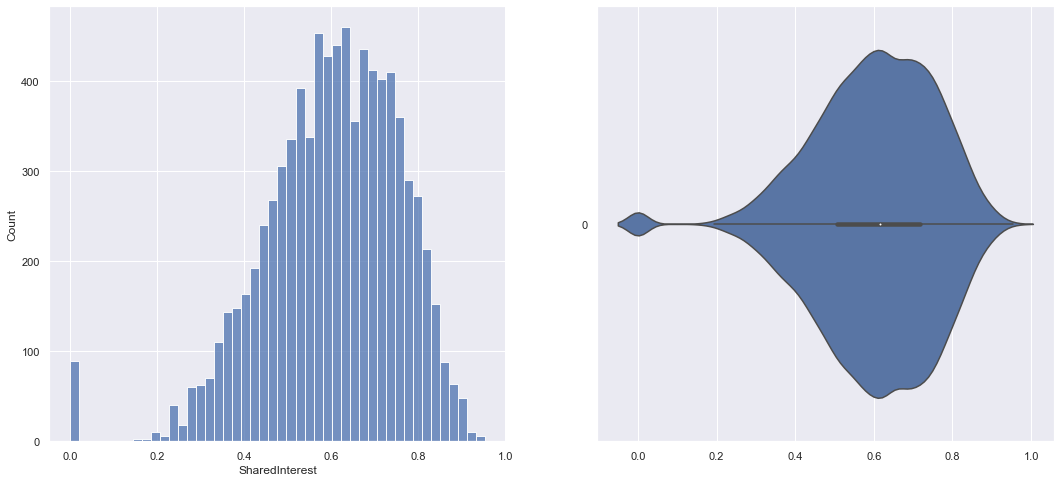

In [11]:
f, axes = plt.subplots(1, 2, figsize=(18, 8))
sb.histplot(data = similar["SharedInterest"], ax = axes[0])
sb.violinplot(data = similar["SharedInterest"], orient = "h", ax = axes[1])

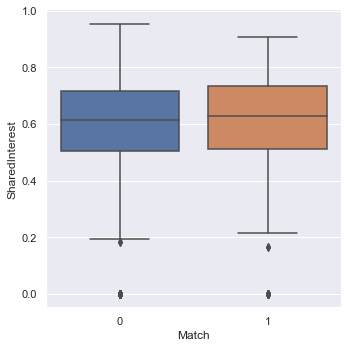

In [47]:
sb.catplot(x="match", y="SharedInterest", kind="box", data=similar).set_xlabels("Match")

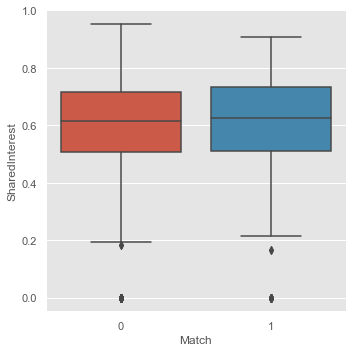

In [21]:
with plt.style.context('ggplot'):
    sb.catplot(x="match", y="SharedInterest", kind="box", data=similar).set_xlabels("Match")

### This code will combine 4 variables : SharedInterest, Samerace, Same Region(```from``` variable), same field (aggregated to Business, Law, Service, and Academic from field variable)

Secondly, we go with ```race``` variable

In [ ]:
data_sim["race_o"] = data_sim["race_o"].map({2.0 : "Europe", 4.0 : "Asian", 3.0 : "Latin", 6.0 : "Other", 1.0: "Black"})

In [ ]:
sb.catplot(y = "race_o", data = data_sim, kind = "count")

Here we can extend our analysis further: to racial preference but due to the limit of the research scope, we place the problem in future analysis


In [ ]:
similar["SameRace"] = data_sim["samerace"]
print(similar["SameRace"].value_counts())
sb.catplot(y = "SameRace", data = similar, kind = "count")

Next we will head into the ```from``` variable

In [ ]:
print("Missing values in 'from' variable: ", data_sim["from"].isnull().sum())
data_sim["from"].value_counts()

So ```from``` does not have any missing value, that is safe. Continue on.

Here we can see the ```from``` variable consists of city's name where subject live, but we only care about whether two people in a date is come from one region or not, it is natural if we aggregate ```from``` values into categories: [North America, Western Europe, Eastern Europe, Central Asia, Middle East, South Asia, East Asia, Latin America,
or Africa]

We can use a library to classify these cities into above categories

In [ ]:
# Checkpoint during running code
similar.shape
similar.head(5)

In [ ]:
city_name = data_sim["from"].unique()
print(len(city_name))
print(city_name)

We can see here, there is a lot of ancronym and flaw format answer ( most of them come from USA ), so we just mapping some flaw answer city name into already defined map and the rest go with USA


In [ ]:
import re
flaw_address = ["94115", "Wash DC (4 yrs)", "I am from NYC", "San Francisco(home)/Los Angeles(undergrad)", 
 "nyc", "way too little space here. world citizen."
, "NYC-6 yrs. Grew up in Nebraska", "Born in Montana, raised in South Jersey (nr. Philadelphia)", 
 "raised in South Jersey (nr. Philadelphia)",  "J.P. Morgan", "CT, FL, TN", "Katonah, NY (more recently, Boston)"]

US = ['Brooklyn', 'Florida', 'Tuscaloosa, Alabama', 'Albuquerque, NM'
 'Palo Alto, California','Boston, MA', 'Mexico', 'Torrance, CA',
 'St. Louis, MO','South Orange, New Jersey',
 'Boston, Ma' , 'Kansas City, Missouri', 'Upstate New York']

usRegex = re.compile(r"New York|NY|N.Y|NYC|PA|[C-c]alifornia|CA|Los Angeles|DC|D.C|USA|TX|MA|GA|NJ|nyc|San Francisco")
country_mapping = {}
for i in city_name:
    res = usRegex.search(i)
    if(res is not None):
        US.append(i)
for i in flaw_address:
    country_mapping[i] = "United States"
for i in US:
    country_mapping[i] = "United States"

In [ ]:
print(country_mapping)
print(len(country_mapping))

In [ ]:
import geopy as gp
from geopy import geocoders
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# A recursive function used to continue request the data even it is bad request
def do_geocode(address, attempt=1, max_attempts=5):
    try:
        return geolocator.geocode(address, exactly_one = False, language="en")
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(address, attempt=attempt+1)
        raise

gp.geocoders.options.default_user_agent = "Phan Nhat Hoang"
geolocator = Nominatim(timeout=5, scheme='http', user_agent = gp.geocoders.options.default_user_agent)

city_name = data_sim["from"].unique()
len_city = len(city_name)

for i in city_name:
    if(i in flaw_address or i in US):
        continue
    res = do_geocode(i)
    if(res is not None):
        location = geolocator.reverse(str(res[0].latitude) + "," + str(res[0].longitude), language="en")
        country = location.raw['address']["country"]
        country_mapping[i] = country
    elif not (country_mapping.get(i)):
        country_mapping[i] = "United States"


In [ ]:
data_sim["Region"] = pd.Series(["" for i in range(data_sim.shape[0])]).astype("string")
for i in range(data_sim.shape[0]):
    data_sim.loc[:,"Region"].iloc[i] = country_mapping[data_sim.iloc[i]["from"]]
data_sim["Region"].value_counts()

In [ ]:
region_data = pd.read_csv("data/necessary/continents2.csv")
# print(region_data.head(5))
region_mapping = {}

# print(region_data.loc[:,"name"].iloc[1])
for i in range(region_data.shape[0]):
    region_mapping[str(region_data.loc[:,"name"].iloc[i])] = region_data.loc[:,"sub-region"].iloc[i]

for i in range(similar.shape[0]):
    if(region_mapping.get(data_sim.iloc[i]["Region"]) is not None):
        data_sim.loc[:,"Region"].iloc[i] = region_mapping.get(data_sim.loc[:, "Region"].iloc[i])
#     else:       
#         print(data_sim.iloc[i]["Region"])
print("Missing value: ", data_sim["Region"].isnull().sum())
data_sim["Region"].value_counts()

In [ ]:
# id_table = {(iid, id) : position (reference to rows) in data_sim}

similar["SameRegion"] = pd.Series([0 for i in range(data_sim.shape[0])], index = data_sim.index).astype("int")
for i in range(data_sim.shape[0]):
    partner_iid = data_sim.iloc[i]["pid"]
    partner_id = data_sim.iloc[i]["partner"]
    partner_index = 0
    if(id_table.get((partner_iid, partner_id))):
        partner_index = id_table.get((partner_iid, partner_id))
        if (data_sim.iloc[i]["Region"] == data_sim.iloc[partner_index]["Region"]):
            similar.at[similar.index[i], "SameRegion"] = 1
        else:
            similar.at[similar.index[i], "SameRegion"] = 0
    else:
        similar.at[similar.index[i], "SameRegion"] = 0

In [ ]:
# Checking for the null value after concatenate: error might be 
# happen during the merge: missing index, missing value.
print("Missing Values after mereged and the shape of desired similar dataset")
print(similar.shape)
print(similar.isnull().sum())

In [ ]:
similar["SameRegion"]
sb.catplot(y = "SameRegion", data = similar, kind = "count")

### ```SameField``` variable,  
Same Field is an indicator variable denoting that the subject and partner are in the same area of
study (aggregated to Business, Law, Service, and Academic) 

In [31]:
# This series is solely serve the data visualization purpose
temp_field = pd.DataFrame()
temp_field["field_cd"] = data_sim.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med Sci',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Bio. Sc.', 11: 'Soc. Wrk.', 12: 'Undergrad', 13: 'Pol. Sci.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(data_sim.field_cd)
temp_field["gender"] = data_sim.gender
temp_field["field_cd"].value_counts(dropna=False)

Econ         1925
Bio. Sc.      993
Eng.          864
Pol. Sci.     709
Soc. Sc.      680
Law           665
Educ.         626
Soc. Wrk.     468
Journ.        325
Hist.         241
Math          207
Arts          187
Med Sci       143
Film          126
Oth.           52
Lang.          40
NaN            19
Undergrad      19
Arch.          10
Name: field_cd, dtype: int64

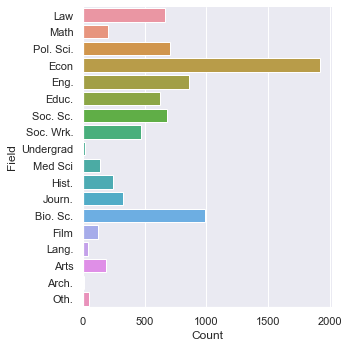

In [45]:

# msk_gender = (similar["match"] == 1)
sb.catplot(y = "field_cd", data = temp_field, kind = "count").set_xlabels("Count").set_ylabels("Field")

In [35]:
print("The number of people who does not have job yet: " , temp_field["field_cd"].isna().sum())

The number of people who does not have job yet:  19


Text(0.5, 0, '')

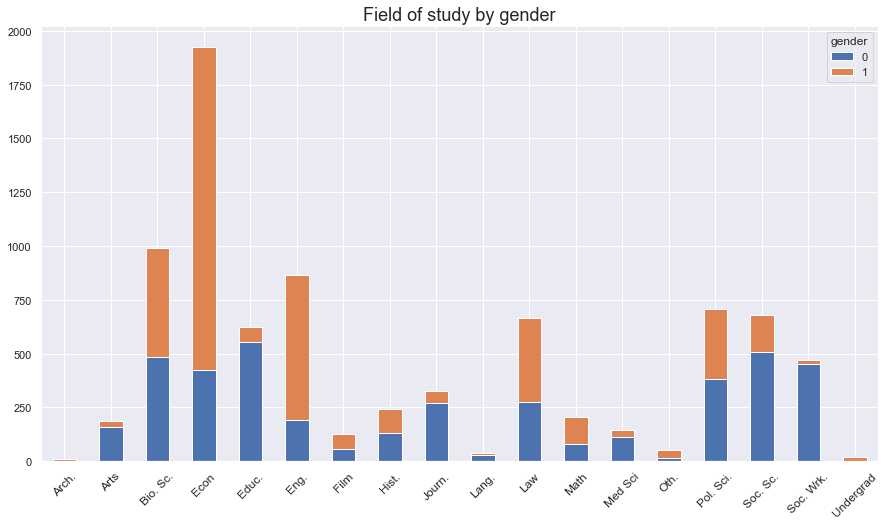

In [36]:
studies = temp_field[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
ax = studies.plot(kind='bar', figsize=(15,8), stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Field of study by gender', fontsize=18)
ax.set_xlabel('',fontsize=1)

In [37]:
#Since the data is generated in Columbia business school, where most of students major in Business and Law. So 
#it is natural to see: people surround you are all same interest in study with you, "what is your tendency to date
#someone is not in your circle"
from random import randint
Business = [8]
Law = [1, 13]
Engineering = [5, 17]
Service = [6, 11, 14, 15, 18, 4, 12]
Academic = [2, 3, 7, 9, 10, 16]

array_field = [Business, Law, Engineering, Service, Academic]
temp_string_field = ["Business", "Law", "Engineering", "Service", "Academic"]

for i in range(data_sim.shape[0]):
    found = False
    for j in range(5):
        if(data_sim.at[data_sim.index[i], "field_cd"] in array_field[j]):
            data_sim.at[data_sim.index[i],"field_cd"] = j
            found = True
            break
    if not found:
        data_sim.at[data_sim.index[i],"field_cd"] = randint(0,4)
data_sim.astype({"field_cd": str})
# print(data_sim.shape[0], count)
def decode_num(x):
    return temp_string_field[int(x)]
data_sim["field_cd"] = data_sim["field_cd"].apply(decode_num)

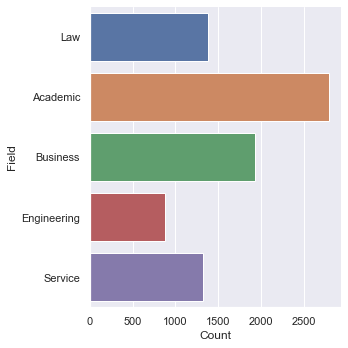

In [48]:
sb.catplot(y = "field_cd", data = data_sim, kind = "count").set_xlabels("Count").set_ylabels("Field")

In [39]:
temp = pd.Series(np.array([0 for i in range(data_sim.shape[0])]), index = data_sim.index)
cnt = 0
for i in range(data_sim.shape[0]):
    own_field = data_sim["field_cd"].iloc[i]
    partner_in = []
    partner_iid = data_sim.iloc[i]["pid"]
    partner_id = data_sim.iloc[i]["partner"]
    partner_index = 0
    if(id_table.get((partner_iid, partner_id))):
        partner_index = id_table.get((partner_iid, partner_id))
        partner_field = data_sim.iloc[partner_index]["field_cd"]
        if(partner_field == own_field):
            temp.iloc[i] = 1
similar = pd.concat([similar, temp.rename("SameField")], axis=1)
# Checking for the null value after concatenate: error might be 
# happen during the merge: missing index, missing value.
print("Missing Values after mereged and the shape of desired similar dataset")
print(similar.shape)
print(similar.isnull().sum())

Missing Values after mereged and the shape of desired similar dataset
(8299, 4)
match             0
gender            0
SharedInterest    0
SameField         0
dtype: int64


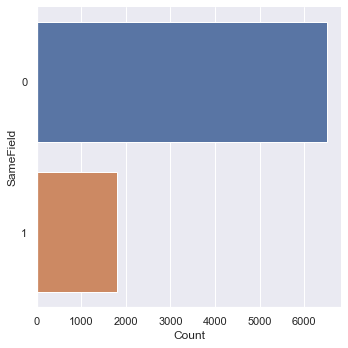

In [43]:
sb.catplot(y = "SameField", data = similar, kind = "count").set_xlabels("Count")

## Extracting csv files for modeling

In [ ]:
similar = similar.iloc[:, ::-1]
print(similar.head())
similar_male, similar_female = splitGender(similar)
similar_male.to_csv("data/similar_male.csv", index=False)
similar_female.to_csv("data/similar_female.csv", index=False)
